In [1]:
import geopandas as gpd
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds_csv = pd.read_csv('/Users/molina/MD-demographics.csv', header=0)

In [3]:
ds_csv

,County,area (square miles),population,employment rate (percent),income (median household income),education (bachelor's degree or higher),hispanic/latino,median age,poverty (percent),black,asian,white
0,Caroline County,319.4,33293,61%,59042,19%,2820,39.3,13.30%,4434,350,24479
1,Talbot County,268.5,37526,55.60%,73102,39.70%,3352,51.0,8.50%,4249,538,28436
2,Dorchester County,540.8,32531,56.30%,52799,19.90%,1777,44.8,16.20%,9140,355,20128
3,Wicomico County,374.4,103588,57.60%,63333,29.20%,7091,35.9,13.70%,27990,3152,61425
4,Somerset County,319.7,24620,43.10%,44980,15.80%,1075,36.9,20%,9505,254,13076
5,Worcester County,468.3,52460,55%,65396,29.80%,2078,50.5,9.20%,6236,753,41845
6,Queen Anne's County,371.7,49874,63.20%,96467,36.50%,2538,44.7,6.20%,2811,589,42290
7,Kent County,277.0,19198,56.40%,60208,36.30%,1061,48.0,11%,2808,251,14574
8,Cecil County,346.3,103725,56.80%,75692,26.30%,5450,41.3,12.60%,7803,1247,84806
9,Harford County,437.1,260924,65.20%,96328,37.80%,14007,39.6,7.80%,37706,8173,190128


In [4]:
ds_csv['hispanic/latino from total population'] = ds_csv['hispanic/latino'].values / ds_csv['population'].values
ds_csv['black from total population'] = ds_csv['black'].values / ds_csv['population'].values
ds_csv['asian from total population'] = ds_csv['asian'].values / ds_csv['population'].values
ds_csv['white from total population'] = ds_csv['white'].values / ds_csv['population'].values

In [5]:
ds_csv

,County,area (square miles),population,employment rate (percent),income (median household income),education (bachelor's degree or higher),hispanic/latino,median age,poverty (percent),black,asian,white,hispanic/latino from total population,black from total population,asian from total population,white from total population
0,Caroline County,319.4,33293,61%,59042,19%,2820,39.3,13.30%,4434,350,24479,0.084702,0.133181,0.010513,0.735260
1,Talbot County,268.5,37526,55.60%,73102,39.70%,3352,51.0,8.50%,4249,538,28436,0.089325,0.113228,0.014337,0.757768
2,Dorchester County,540.8,32531,56.30%,52799,19.90%,1777,44.8,16.20%,9140,355,20128,0.054625,0.280963,0.010913,0.618733
3,Wicomico County,374.4,103588,57.60%,63333,29.20%,7091,35.9,13.70%,27990,3152,61425,0.068454,0.270205,0.030428,0.592974
4,Somerset County,319.7,24620,43.10%,44980,15.80%,1075,36.9,20%,9505,254,13076,0.043664,0.386068,0.010317,0.531113
5,Worcester County,468.3,52460,55%,65396,29.80%,2078,50.5,9.20%,6236,753,41845,0.039611,0.118872,0.014354,0.797655
6,Queen Anne's County,371.7,49874,63.20%,96467,36.50%,2538,44.7,6.20%,2811,589,42290,0.050888,0.056362,0.011810,0.847937
7,Kent County,277.0,19198,56.40%,60208,36.30%,1061,48.0,11%,2808,251,14574,0.055266,0.146265,0.013074,0.759142
8,Cecil County,346.3,103725,56.80%,75692,26.30%,5450,41.3,12.60%,7803,1247,84806,0.052543,0.075228,0.012022,0.817604
9,Harford County,437.1,260924,65.20%,96328,37.80%,14007,39.6,7.80%,37706,8173,190128,0.053682,0.144510,0.031323,0.728672


In [6]:
ds_csv.columns

Index(['County', 'area (square miles)', 'population',
       'employment rate (percent)', 'income (median household income)',
       'education (bachelor's degree or higher)', 'hispanic/latino',
       'median age', 'poverty (percent)', 'black', 'asian', 'white',
       'hispanic/latino from total population', 'black from total population',
       'asian from total population', 'white from total population'],
      dtype='object')

In [7]:
ds_csv.to_csv('/Users/molina/Desktop/MD-mesonet-demographics.csv')

In [8]:
md_counties = gpd.read_file('/Users/molina/Desktop/tl_2021_us_county/tl_2021_us_county.shp')

In [9]:
md_counties = md_counties.loc[md_counties['STATEFP']=='24']

In [10]:
md_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
130,24,047,01668802,24047,Worcester,Worcester County,06,H1,G4020,480,41540,None,A,1213156434,586531107,+38.2221332,-075.3099315,"POLYGON ((-75.28336 38.02377, -75.28462 38.023..."
169,24,001,01713506,24001,Allegany,Allegany County,06,H1,G4020,None,19060,None,A,1093489884,14710932,+39.6123134,-078.7031037,"POLYGON ((-78.80894 39.60822, -78.80903 39.608..."
183,24,510,01702381,24510,Baltimore,Baltimore city,25,C7,G4020,548,12580,None,F,209649327,28758743,+39.3000324,-076.6104761,"POLYGON ((-76.71151 39.36621, -76.71151 39.366..."
336,24,015,00596115,24015,Cecil,Cecil County,06,H1,G4020,428,37980,48864,A,896912533,185281256,+39.5623537,-075.9415852,"POLYGON ((-75.77209 39.44558, -75.77207 39.445..."
655,24,005,01695314,24005,Baltimore,Baltimore County,06,H1,G4020,548,12580,None,A,1549740652,215957832,+39.4431666,-076.6165693,"POLYGON ((-76.69766 39.72109, -76.69751 39.721..."
816,24,013,01696228,24013,Carroll,Carroll County,06,H1,G4020,548,12580,None,A,1159355859,13112464,+39.5633280,-077.0153297,"POLYGON ((-76.95782 39.72040, -76.95671 39.720..."
874,24,009,01676636,24009,Calvert,Calvert County,06,H1,G4020,548,47900,47894,A,552158542,341580668,+38.5227191,-076.5297621,"POLYGON ((-76.41579 38.48980, -76.41393 38.487..."
908,24,019,00596495,24019,Dorchester,Dorchester County,06,H1,G4020,480,15700,None,A,1400573746,1145353068,+38.4291957,-076.0474333,"POLYGON ((-75.91300 38.31842, -75.91541 38.316..."
1025,24,003,01710958,24003,Anne Arundel,Anne Arundel County,06,H1,G4020,548,12580,None,A,1074353889,448032843,+38.9916174,-076.5608941,"POLYGON ((-76.58029 39.20661, -76.57969 39.206..."
1050,24,021,01711211,24021,Frederick,Frederick County,06,H1,G4020,548,47900,23224,A,1710922224,17674121,+39.4701773,-077.3976358,"POLYGON ((-77.45475 39.22166, -77.45493 39.221..."


In [11]:
md_counties['population'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['population'].values
md_counties['area (square miles)'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['area (square miles)'].values
md_counties['employment rate (percent)'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['employment rate (percent)'].values
md_counties['income (median household income)'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['income (median household income)'].values
md_counties["education (bachelor's degree or higher)"] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]["education (bachelor's degree or higher)"].values
md_counties['median age'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['median age'].values
md_counties['poverty (percent)'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['poverty (percent)'].values
md_counties['hispanic/latino from total population'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['hispanic/latino from total population'].values
md_counties['black from total population'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['black from total population'].values
md_counties['asian from total population'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['asian from total population'].values
md_counties['white from total population'] = ds_csv.iloc[[
    5,22,11,8,10,19,14,2,13,20,17,12,23,18,6,1,3,4,9,15,7,16,21,0]]['white from total population'].values

In [12]:
md_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,area (square miles),employment rate (percent),income (median household income),education (bachelor's degree or higher),median age,poverty (percent),hispanic/latino from total population,black from total population,asian from total population,white from total population
130,24,047,01668802,24047,Worcester,Worcester County,06,H1,G4020,480,...,468.3,55%,65396,29.80%,50.5,9.20%,0.039611,0.118872,0.014354,0.797655
169,24,001,01713506,24001,Allegany,Allegany County,06,H1,G4020,None,...,422.1,46.40%,48888,21.80%,41.3,14.50%,0.016871,0.078422,0.010895,0.857149
183,24,510,01702381,24510,Baltimore,Baltimore city,25,C7,G4020,548,...,80.9,57.20%,54652,37.70%,36.1,23%,0.078413,0.577895,0.036213,0.278340
336,24,015,00596115,24015,Cecil,Cecil County,06,H1,G4020,428,...,346.3,56.80%,75692,26.30%,41.3,12.60%,0.052543,0.075228,0.012022,0.817604
655,24,005,01695314,24005,Baltimore,Baltimore County,06,H1,G4020,548,...,598.4,61.70%,80453,40.40%,39.9,9.80%,0.071960,0.299336,0.064325,0.529088
816,24,013,01696228,24013,Carroll,Carroll County,06,H1,G4020,548,...,447.6,65.40%,102476,39.90%,41.3,4.70%,0.044797,0.037492,0.021835,0.859623
874,24,009,01676636,24009,Calvert,Calvert County,06,H1,G4020,548,...,213.2,63.20%,122266,34.40%,40.5,4.90%,0.045288,0.130412,0.017040,0.753748
908,24,019,00596495,24019,Dorchester,Dorchester County,06,H1,G4020,480,...,540.8,56.30%,52799,19.90%,44.8,16.20%,0.054625,0.280963,0.010913,0.618733
1025,24,003,01710958,24003,Anne Arundel,Anne Arundel County,06,H1,G4020,548,...,414.8,62.70%,107823,43.10%,38.4,5.80%,0.096549,0.177596,0.043355,0.641950
1050,24,021,01711211,24021,Frederick,Frederick County,06,H1,G4020,548,...,660.4,65.80%,104780,44.90%,38.8,6.80%,0.118208,0.102320,0.049942,0.697306


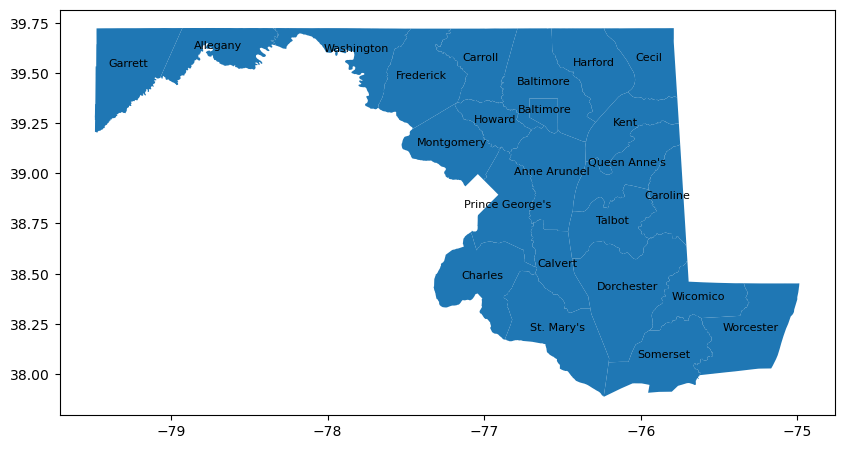

In [13]:
ax = md_counties.plot(figsize=(10,6))
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/cnt_md.png', bbox_inches='tight', dpi=200)

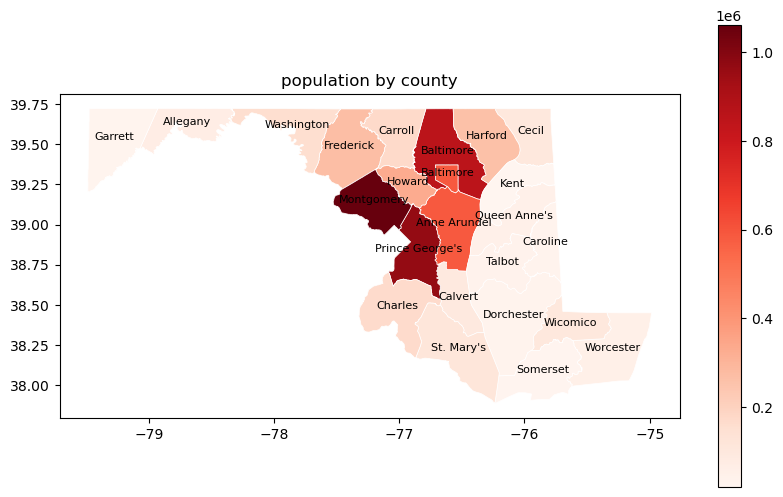

In [14]:
ax = md_counties.plot(column='population', cmap='Reds', legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('population by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/pop_md.png', bbox_inches='tight', dpi=200)

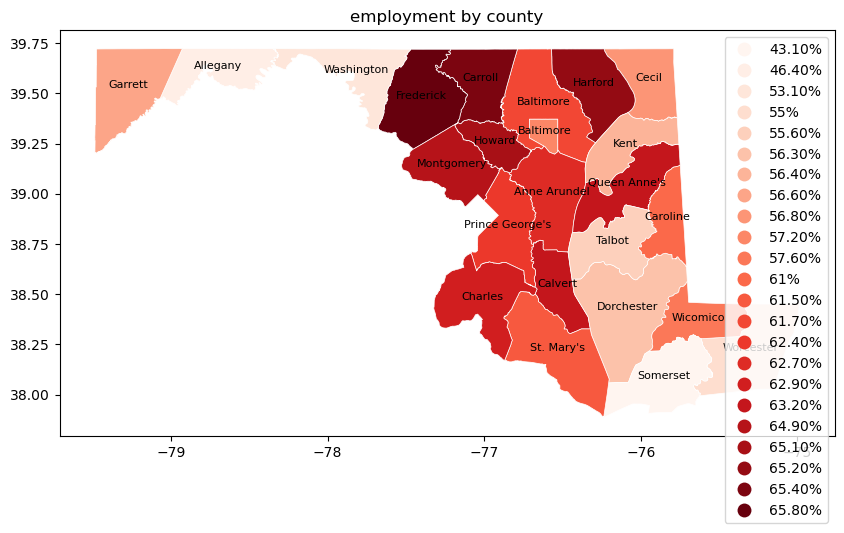

In [15]:
ax = md_counties.plot(column='employment rate (percent)', cmap='Reds', 
                      legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('employment by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/emp_md.png', bbox_inches='tight', dpi=200)

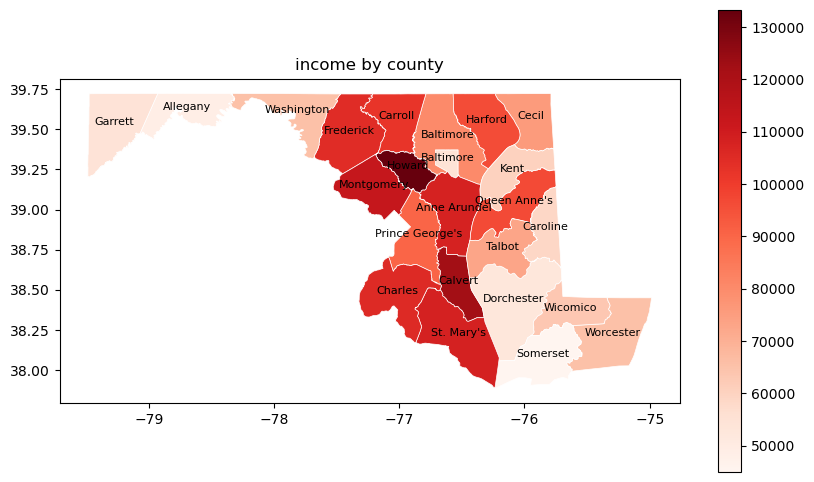

In [16]:
ax = md_counties.plot(column='income (median household income)', cmap='Reds', 
                      legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('income by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/income_md.png', bbox_inches='tight', dpi=200)

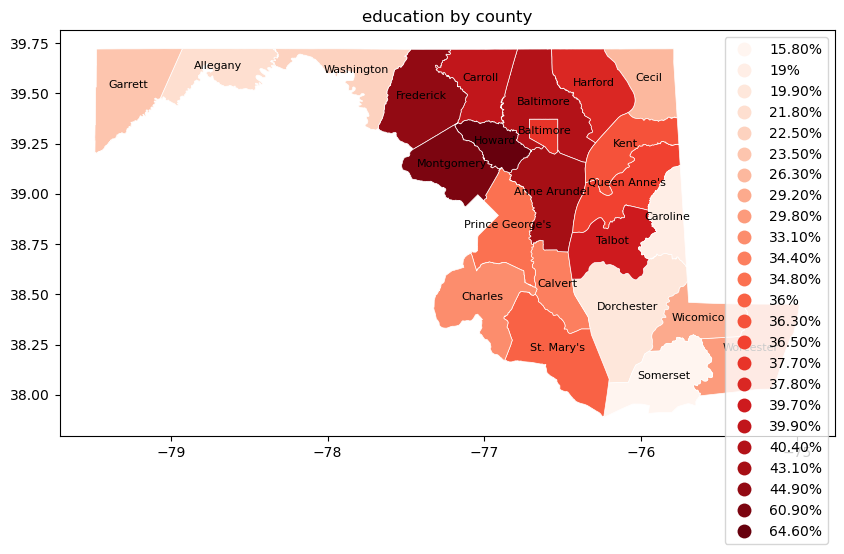

In [17]:
ax = md_counties.plot(column="education (bachelor's degree or higher)", cmap='Reds', 
                      legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('education by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/edu_md.png', bbox_inches='tight', dpi=200)

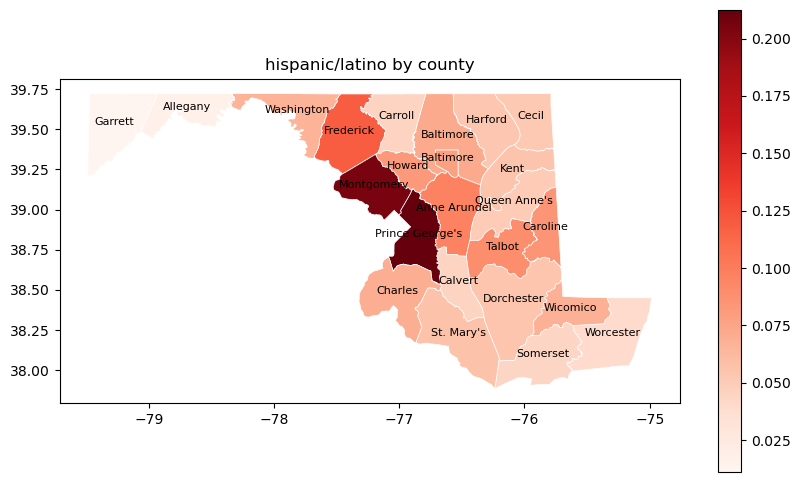

In [21]:
ax = md_counties.plot(column='hispanic/latino from total population', cmap='Reds', 
                      legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('hispanic/latino by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/hisp_md.png', bbox_inches='tight', dpi=200)

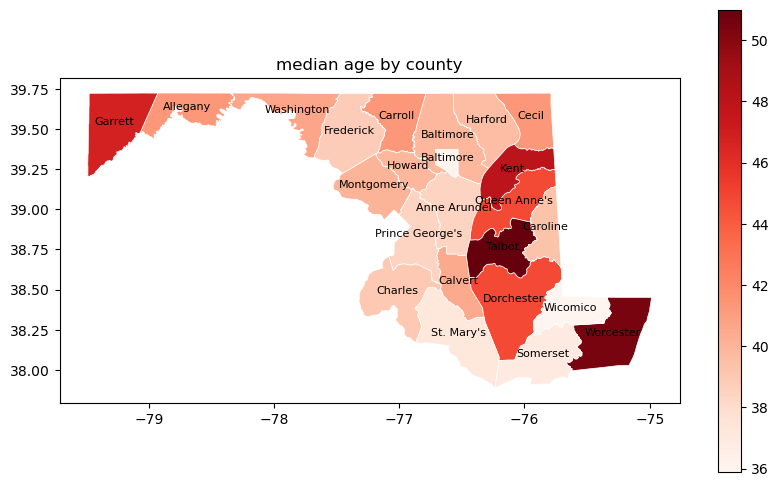

In [22]:
ax = md_counties.plot(column='median age', cmap='Reds', legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('median age by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/age_md.png', bbox_inches='tight', dpi=200)

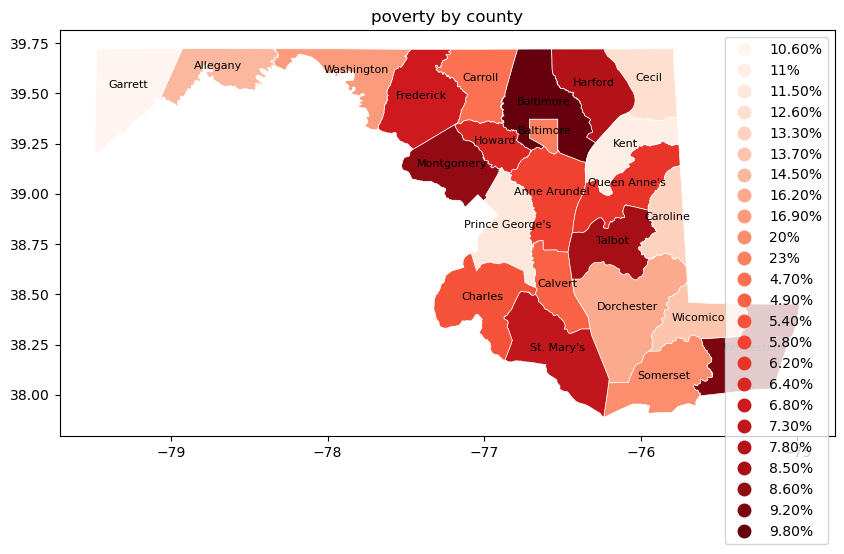

In [23]:
ax = md_counties.plot(column='poverty (percent)', cmap='Reds', legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('poverty by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/pov_md.png', bbox_inches='tight', dpi=200)

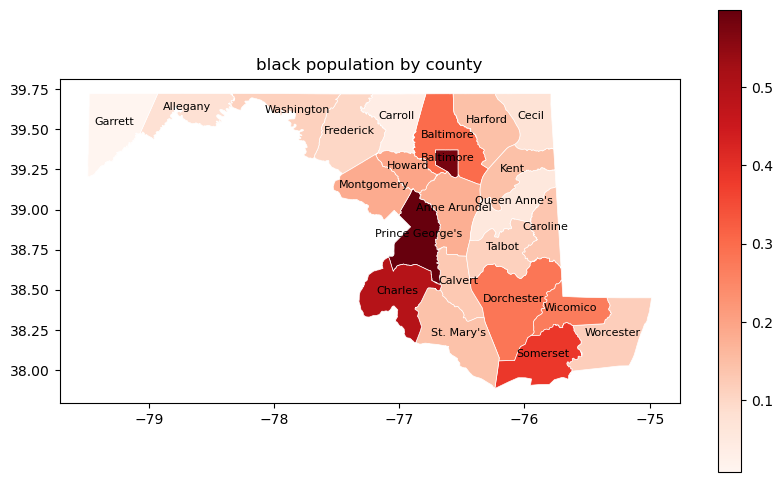

In [20]:
ax = md_counties.plot(column='black from total population', cmap='Reds', 
                      legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('black population by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/blck_md.png', bbox_inches='tight', dpi=200)

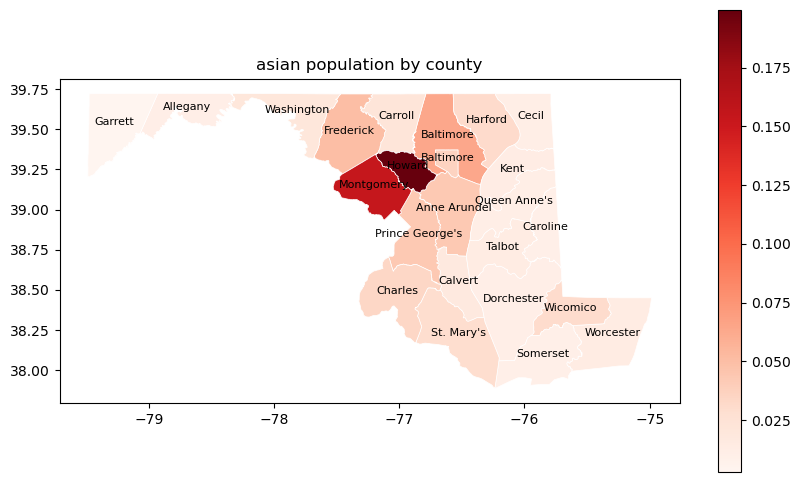

In [19]:
ax = md_counties.plot(column='asian from total population', cmap='Reds', 
                      legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('asian population by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/asia_md.png', bbox_inches='tight', dpi=200)

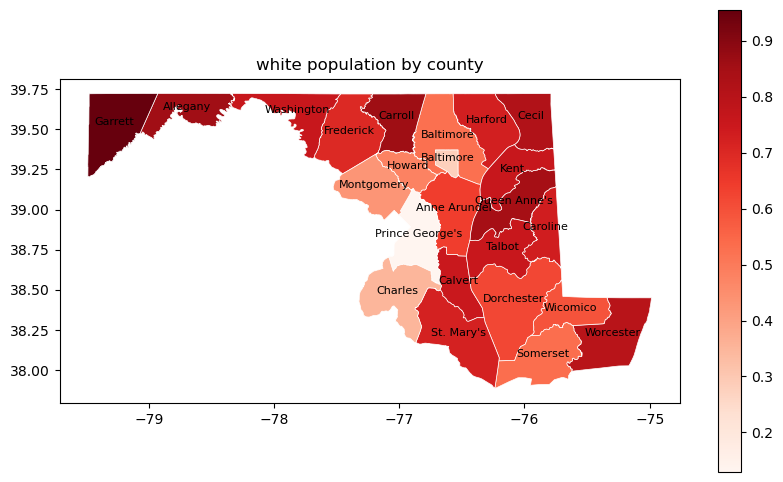

In [18]:
ax = md_counties.plot(column='white from total population', cmap='Reds', 
                      legend=True, edgecolor='w', lw=0.5, figsize=(10,6))
ax.set_title('white population by county')
md_counties.apply(lambda x: ax.annotate(
    text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1);
plt.savefig('/Users/molina/Desktop/whte_md.png', bbox_inches='tight', dpi=200)